# Vergleich des Mittelwertes (oder eines anderen Parameters) zweier unverbundener Stichproben 

In [2]:
# Wir führen wie immer das folgende aus, damit wir alle Module zur Verfügung haben.
# Außerdem erzeugen wir einen Wert, den wir als Mittelwert einer Verteilung benutzen werden.

# numpy mit allen Untermodulen importieren
import numpy as np
from scipy import stats as sps
# Matplotlib Untermodul pyplot importieren
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
# Plotten innerhalb des Notebooks aktivieren:
%matplotlib inline

## Lernziel
Wir wollen heute lernen, eine Entscheidung zu treffen, ob die Mittelwerte (und andere Parameter) zweier Verteilungen wohl verschieden sind.

Wie üblich haben wir nur Stichproben vorliegen, diesmal allerdings zwei Stichproben - eine von jeder Verteilung. Wie immer ist zu beachten, dass die Stichproben nur einen kleinen Ausschnitt aus der gesamten Verteilung bieten und das die stichproben zufällig gezogen sind. Die Stichprobenmittelwerte sind also mit Ungenauigkeit behaftet. Wir wollen trotz dieser Unischerheit entscheiden, ob der Mittelwert einer Stichprobe größer oder kleiner ist als der der anderen. Die Behauptung, dass dies so ist nennen wir eine Hypothese. Der (interssanten) Hypothese, daß die Mittelwerte der Verteilungen (!) verschieden sind, steht die sogenannte **Null-Hypothese** gegenüber, dass die **Mittelwerte der Verteilungen gleich** sind. 

Wenn die Nullhypothese wahr ist, können die beobachteten Stichprobenmittelwerte immer noch verschieden sein, da die Stichproben ja zufällig gezogen wurden (tatsächlich werden Stichprobenmittelwerte fast immer verschieden sein).

Wir können in dieser Situation, ohne weiteres Wissen, zunächst einmal nur entscheiden, ob der beobachtete Unterscheid auch dann 'typisch' erscheint, wenn die Nullhypothese wahr wäre.

Dazu simulieren wir mit Hilfe unserer Stichproben mögliche andere Unterschiede - und zwar so, daß unsere Simulationen die Nullhypothese wiederspiegeln. Sind die simulierten Unterschiede dann ähnlich zu unserer Nullhypothese, so gehen wir davon aus, dass der beobachtete Unterschied zufällig ist und keine weiteren Analysen, Untersuchungen etc. erfordert.



### Stichproben
Unsere Daten sind die Größen von Spogs und Spacats aus dre Vorlesung. Diese hier einfach als Listen hingeschrieben.

Für die Spacats haben wir diese Größen beobachtet:

[0.7, 1.2, 1.5, 0.6, 1.3, 1.2, 1.1, 1.0]

und für die Spogs diese hier:

[1.2, 0.4, 1.8, 0.5, 0.4, 1.9, 2.0, 1.1, 1.3, 1.5, 1.6]


In [3]:
# AUFGABE: Oben haben wir zwar zwei Listen mit Werten,
# aber wir könne diese in Python noch nicht benutzen, 
# da sie noch keinen Variablennamen haben.
# Geben Sie der Liste für die Spacats den Namen:
# gr_spacats (für groessen der Spacats)
# und der Liste für die Spogs den Namen:
# gr_spogs
gr_spacats = [0.7, 1.2, 1.5, 0.6, 1.3, 1.2, 1.1, 1.0]
gr_spogs = [1.2, 0.4, 1.8, 0.5, 0.4, 1.9, 2.0, 1.1, 1.3, 1.5, 1.6]
print(len(gr_spacats), len(gr_spogs))


8 11


**Wichtiger Hinweis**: Stellen Sie sicher, dass Sie die nächste Aufgabe korrekt erledigen, da wir diese Variablen weiter unten brauchen!

In [4]:
# AUFGABE: Um diese Listen mit den praktischen Funktionen aus numpy
# verwenden zu können, müssen wir diese noch in arrays umwandeln
# dies geht mit dem Befehl np.array(liste)
# Vergessen Sie nicht auch den umgewandelten Listen, also den arrays 
# wieder Variablennamen zu geben, und zwar
# arr_gr_spacats, arr_g_spogs
arr_gr_spacats = np.array(gr_spacats)
arr_gr_spogs = np.array(gr_spogs)

In [5]:
# AUFGABE: überzeigen Sie sich davon, daß die
# STICHPROBENmittelwerte verschieden sind:
print(np.mean(arr_gr_spacats) != np.mean(arr_gr_spogs))

True


Wir berechnen nun mal die Differenz der Mittelwerte der originalen Stichproben und merken usn diese in einer Variablen (weil wir sie später noch brauchen).

In [6]:
orig_diff_mittel = np.mean(arr_gr_spacats) - np.mean(arr_gr_spogs)
print(orig_diff_mittel)

-0.17045454545454564


### Simulation der Nullhypothese
Wir formulieren unsere Nullhypothese so: Die Verteilungen für Spacats und Spogs sind gleich. Daher sind die einzelnen Werte der Stichproben einfach **austauschbar**.

Wir können daher neue mögliche Ergebnisse simulieren, die mit der Nullhypothese im Einklang sind, indem wir Werte zwischen den Stichproben austauschen und erneut die Größe berechnen, die uns interessiert (hier ist das die Differenz der Stichproben-Mittelwerte).

Wenn wir das oft machen, dann bekommen wir eine Verteilung von Werten (hier Differenzen der simulierten Stichproben-Mittelwerte), wie wir sie erwarten, wenn die Nullhypothese wahhh wäre.

##### Austauschen von Werten zwischen Stichproben:
Wir wollen völlig zufällig Werte zwischen den Stichproben austauschen.
Dazu machen wir drei Schritte:
1. beide Stichproben in einen Topf werfen
2. mischen
3. die Werte wieder in zwei Stichproben der urpsrünglichen Größe aufteilen

In [7]:
# 1. ... in einen Topf werfen = aneinander hängen
# der numpy befehl hierzu ist:
# np.hstack(liste_von_arrays)
# wobei 
# liste_von_arrays = [array1, array2, ...]
gr_alle = np.hstack([arr_gr_spacats, arr_gr_spogs])

In [13]:
# 2. ... mischen
# Befehl:np.random.permutation(array)
gr_alle_permuted = np.random.permutation(gr_alle)
# noch ein kurzer check, daß auch wirklich gemischt wurde:
print(gr_alle is not gr_alle_permuted)

True


In [14]:
# 3. ... Werte wieder in Stichproben der urpsrünglichen Groesse aufteilen.
# wie groß waren unsere Stichproben eigentlich?
anz_erste_stichprobe = np.size(arr_gr_spacats)
anz_zweite_stichprobe = np.size(arr_gr_spogs)
anz_beider_stichproben = np.size(gr_alle)
# ... jetzt die gesammelte und durchgemischte Stichprobe aufteilen:
gr_spacats_simuliert = gr_alle_permuted[0:anz_erste_stichprobe]
gr_spogs_simuliert = gr_alle_permuted[anz_erste_stichprobe:anz_beider_stichproben]

In [15]:
# AUFGABE:Machen Sie sich nochmals klar, was 0-based indexing war und überprüfen Sie,
# ob oben wirklich die richtigen Stichprobengrößen gezogen wurden
print(len(gr_spacats_simuliert) == np.size(arr_gr_spacats))
print(len(gr_spogs_simuliert) == np.size(arr_gr_spogs))

True
True


Wir haben jetzt zwei neue, simulierte Stichproben, die genauso gut sind wie die urpsrünglichen, FALLS die Nullhypothese war ist. Was ist jetzt der Unterschied der Mittelwerte?

In [18]:
sim_diff_mittel = np.mean(gr_spacats_simuliert)-np.mean(gr_spogs_simuliert) 
print(sim_diff_mittel - orig_diff_mittel)

0.10795454545454608


Wir definieren jetzt einen neuen Befehl, der für uns das obige mehrfach macht, um so eine Verteilung der simulierten Mittelwertdifferenzen zu bekommen:

In [19]:
# Alle vorkommenden Befehle haben Sie oben schon gesehen
def simuliere_verteilung_diff(stichprobe_1, stichprobe_2, anz_permutationen):
    diff_orig = np.mean(stichprobe_1) - np.mean(stichprobe_2)
    verteilung_diff_sim = np.full(anz_permutationen+1, np.nan) # ein Element mehr für den originalen Wert (!)
    stichprobe_gesamt = np.hstack([stichprobe_1, stichprobe_2])
    anz_stichprobe_1 = np.size(stichprobe_1)
    anz_stichprobe_2 = np.size(stichprobe_2)
    anz_stichprobe_gesamt = anz_stichprobe_1 + anz_stichprobe_2
    for perm in range(0, anz_permutationen):
        # wichtig: in jedem Durchlauf der for-loop passiert hier auf's neue etwas zufälliges
        stichprobe_gesamt_permuted = np.random.permutation(stichprobe_gesamt)
        stichprobe_1_sim = stichprobe_gesamt_permuted[0:anz_stichprobe_1]
        stichprobe_2_sim = stichprobe_gesamt_permuted[anz_stichprobe_1:anz_stichprobe_gesamt]
        mittelw_sim_1 = np.mean(stichprobe_1_sim)
        mittelw_sim_2 = np.mean(stichprobe_2_sim)
        diff_sim = mittelw_sim_1 - mittelw_sim_2
        verteilung_diff_sim[perm] = diff_sim
        
    verteilung_diff_sim[perm+1] = diff_orig
    
    return verteilung_diff_sim
     
        
        

Wir simulieren hier jetzt die Verteilung der Mittelwertdifferenzen, die wir erwarten würden (müssen), wenn die Nullhypothese wahr wäre:

In [20]:
null_vert_sim =  simuliere_verteilung_diff(arr_gr_spacats, arr_gr_spogs, 2000)

Und plotten diese zusammen mit einer Linie, welche die originale, beobachtete, Differenz angibt:

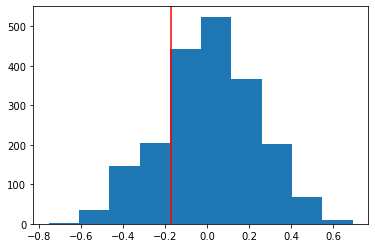

In [21]:
plt.figure()
plt.hist(null_vert_sim);
plt.axvline(orig_diff_mittel, color = 'r');

Dies ist die Verteilung von Mittelwert-Differenzen, welche wir erwarten würden, wenn die Nullhypothese wahr wäre. Wir wollen nun versuchen anhand dieser Verteilung und anhand der wahren Mittelwertdifferenz abzuschätzen, ob wir die Nullhypothese glauben können.

### Entscheidungen über die Nullhypothese (Nullhypothesen-Test)
Wie schon in der Vorlesung erklärt, gibt es keinen Grund die Nullhypothese als falsch einzustufen (zu verwerfen), wenn die originale, beobachtete Mittelwert-Differenz typisch für die simulierte Null-Verteilung ist, also weder 'zu klein', noch 'zu groß'.

Wie überführt man nun die unklaren Begriffe 'zu klein' und 'zu groß' in brauchbare Zahlen?
Kleine Werte liegen ja links in der Verteilung und nur wenige Werte sind noch kleiner, große Werte liegen rechts in der Verteilung und nur wenige Werte sind noch größer.

Für 'zu klein' (um noch typisch zu sein) können wir also auch sagen: 'Es sind nur sehr wenige Werte aus der Null_verteilung noch kleiner' und für 'zu groß' (um noch typisch zu sein) können wir sagen: Es sind nur sehr wenige Werte noch größer'.

Dazu könne wir erstmal festlegen, welche Grenzen wir für zu groß, bzw. zu klein haben wollen. Wir können zum Beispiel entscheiden, nur an die Nullhypothese glauben wollen, wenn mindestens 2.5% der Werte noch kleiner als unser beobachteter Wert sind und auch mindestens 2.5% noch größer sind. Unser beobachteter WErt ist dann in den Zentralen 95% der simulierten Null-Verteilung.

Wir müssen also lediglich das 2.5% und das 97.5%-Quantil (siehe letzte Übung bestimmen) und prüfen, ob unser beobachteter Wert dazwischen liegt.

In [22]:
alpha = 0.05 # mehr hierzu später
untere_prozent_grenze = alpha/2 # 2.5%
obere_prozent_grenze = 1-(alpha/2) # 97.5%
unteres_quantil = sps.mstats.mquantiles(null_vert_sim,prob=[untere_prozent_grenze],
                                        alphap=0, betap=1, axis=None, limit=())
oberes_quantil = sps.mstats.mquantiles(null_vert_sim,prob=[obere_prozent_grenze],
                                        alphap=0, betap=1, axis=None, limit=())

print(unteres_quantil)
print(oberes_quantil)

[-0.42954545]
[0.45568182]


Ist nun die beobachtete Differenz größer oder gleich dem unteren Quantil?

In [23]:
print(orig_diff_mittel  >= unteres_quantil)

[ True]


Dies scheint der Fall zu sein.

Ist die beobachtete Differenz auch kleiner oder gleich dem oberen Quantil?

In [25]:
print(orig_diff_mittel  <= oberes_quantil)
print(unteres_quantil <= orig_diff_mittel <= oberes_quantil)

[ True]
[ True]


Das trifft hier ebenfalls zu.

Wir haben also **keinen Grund die Nullhypothese** gleicher Mittelwerte der Grösse von Spcats und Spogs **zu verwerfen**.

Wir können nun diese Logik in einen einzigen Befehl verpacken, um einen Permutationstest für die Nullhpyothese gleicher Mittelwerte durchzuführen. Verwenden wir den oben definierten Befehl einfach gleich mit:

In [26]:
def permutationstest_unverbunden_mittelwert(stichprobe_1, stichprobe_2, anz_permutationen, alpha):
    orig_diff_mittel = np.mean(stichprobe_1)-np.mean(stichprobe_2)
    null_vert_sim = simuliere_verteilung_diff(stichprobe_1, stichprobe_2, anz_permutationen)
    untere_prozent_grenze = alpha/2 # 2.5%
    obere_prozent_grenze = 1-(alpha/2) # 97.5%
    unteres_quantil = sps.mstats.mquantiles(null_vert_sim,prob=[untere_prozent_grenze],
                                        alphap=0, betap=1, axis=None, limit=())
    oberes_quantil = sps.mstats.mquantiles(null_vert_sim,prob=[obere_prozent_grenze],
                                        alphap=0, betap=1, axis=None, limit=())
    
    print('originale Mittelwert-Differenz:')
    print(orig_diff_mittel)
    print('unteres Quantil:')
    print(unteres_quantil)
    print('oberes Quantil:')
    print(oberes_quantil)
    print('Originale Mittelwert-Differenz größer oder gleich unteres Quantil?')
    print(orig_diff_mittel  >= unteres_quantil)
    print('Originale Mittelwert-Differenz kleiner oder gleich oberes Quantil?')
    print(orig_diff_mittel  <= oberes_quantil)
    
    # das if, else Pärchen von Befehlen unten führt die  Befehle hinter 'if' aus,
    # wenn die Bedingung hinter 'if' wahr ist, und sonst die Befehle hinter 'else'
    if np.logical_and((orig_diff_mittel  >= unteres_quantil),(orig_diff_mittel  <= oberes_quantil)):
        print('Nullhpyothese sollte nicht verworfen werden.')
        return 0 # die Funktion gitb eine 0 aus, wenn die Nullhypothese nicht verworfen wird
    else:
        print('Nullhypothese sollte verworfen werden')
        return 1 # die Funktion gitb eine 1 aus, wenn die Nullhypothese nicht verworfen wird
    
                                            
                                            
                                            

In [27]:
permutationstest_unverbunden_mittelwert(arr_gr_spacats, arr_gr_spogs, 2000, 0.05)

originale Mittelwert-Differenz:
-0.17045454545454564
unteres Quantil:
[-0.45113636]
oberes Quantil:
[0.43409091]
Originale Mittelwert-Differenz größer oder gleich unteres Quantil?
[ True]
Originale Mittelwert-Differenz kleiner oder gleich oberes Quantil?
[ True]
Nullhpyothese sollte nicht verworfen werden.


0

In [30]:
# AUFGABE: Auf dem Mars wurden nun auch 'space pigs' (kurz: spigs) gefunden. Diese sind ziemlich groß.
# Denken Sie sich eine spigs Stichprobe aus, in der alle Werte größer sind als der größte Spog
# führen Sie dann den obigen Nullhypthesentest zwischen Spogs und Spigs durch
# (Hinweis: mit dem obigen Befehl sollte das in wenigen Zeilen zu erledigen sein)

transmute = lambda x: x + 1 # wir machen einfach jedes pig um 1 groesser lol
arr_gr_spigs = np.array([transmute(s) for s in arr_gr_spogs]) # wir wenden fuer jedes spog einmal transmute an und speichern dass in einem array
permutationstest_unverbunden_mittelwert(arr_gr_spigs, arr_gr_spogs, 2000, 0.05)

originale Mittelwert-Differenz:
1.0
unteres Quantil:
[-0.63636364]
oberes Quantil:
[0.61818182]
Originale Mittelwert-Differenz größer oder gleich unteres Quantil?
[ True]
Originale Mittelwert-Differenz kleiner oder gleich oberes Quantil?
[False]
Nullhypothese sollte verworfen werden


1

### Welche Garantien liefert so ein Nullhypothesen-Test?
Ein Nullhypothesen-Test mit den den alpha/2 unteren und oberen Quantilen (Grenzen) garantiert **über viele, viele Experimente hinweg**, dass wir die Nullhpyothese nur in alpha% der Fälle fälschlicherweise verwerfen.

**Alpha heisst dabei auch die Wahrscheinlichkeit für Fehler erster Art,** d.h. für fälschliches Verwerfen der Nullhypothese.

Das probieren wir schnell noch aus, indem wir sehr oft zwei Stichproben aus der exakt gleiche Verteilung ziehen und vergleichen. Einige der Test sollten zum Verwerfen der Stichprobe führen - trotz Gleichheit der Verteilungen, aus der die beiden Stichproben stammen.

(Die nächste Zelle hat viel Output, den Sie ignorieren können. Es geht dann mit der nächsten und übernächsten  Zelle weiter.)

In [69]:
anz_falsche_tests = 0
for index in range(0,100):
    stp_1 = np.random.uniform(0,1,10)
    stp_2 = np.random.uniform(0,1,10)
    resultat = permutationstest_unverbunden_mittelwert(stp_1, stp_2, 500, 0.05);
    print(resultat);
    # wir addieren nun in jeder Runde der for loop
    # das Ergebnis des tests (0 oder 1) zu anz_falsche_tests hinzu
    # d.h. wir zählen die falschen tests
    # das kann man in Python (und den meistens anderen Sprachen)
    # so machen:
    anz_falsche_tests = anz_falsche_tests + resultat

# alternativ
stp = lambda: np.random.uniform(0,1,10)
results = lambda: permutationstest_unverbunden_mittelwert(stp(), stp(), 500, 0.05)
falsche_tests = sum([results() for x in range(100)])

originale Mittelwert-Differenz:
0.27278796163865204
unteres Quantil:
[-0.23572209]
oberes Quantil:
[0.28417593]
Originale Mittelwert-Differenz größer oder gleich unteres Quantil?
[ True]
Originale Mittelwert-Differenz kleiner oder gleich oberes Quantil?
[ True]
Nullhpyothese sollte nicht verworfen werden.
0
originale Mittelwert-Differenz:
0.07451691214204437
unteres Quantil:
[-0.21886178]
oberes Quantil:
[0.21476307]
Originale Mittelwert-Differenz größer oder gleich unteres Quantil?
[ True]
Originale Mittelwert-Differenz kleiner oder gleich oberes Quantil?
[ True]
Nullhpyothese sollte nicht verworfen werden.
0
originale Mittelwert-Differenz:
0.08257230343148181
unteres Quantil:
[-0.25429855]
oberes Quantil:
[0.2433901]
Originale Mittelwert-Differenz größer oder gleich unteres Quantil?
[ True]
Originale Mittelwert-Differenz kleiner oder gleich oberes Quantil?
[ True]
Nullhpyothese sollte nicht verworfen werden.
0
originale Mittelwert-Differenz:
-0.04736515101448957
unteres Quantil:
[-0.

In [36]:
# AUFGABE: Was erwarten Sie als Ausgabe für die nächste Zelle? ANTWORT: 5
# HILFE: wieviel Tests haben wir gerade gemacht? ANTWORT: 100
# HILFE: schauen Sie genau, wie die Variable anz_falsche_tests ihre Werte erhält -> Inkrementierung um 1, wenn die NH verworfen wird,
#     da die Funktion `permutationstest_unverbunden_mittelwert` bei diesem Szenario 1 zurueckgibt.

In [71]:
print('Anzahl falsche Tests:\n')
print(falsche_tests)
print(anz_falsche_tests)

Anzahl falsche Tests:

5
5


## Optional/Wiederholung: Bootstrapverteilungen der Mittelwerte
Wir benutzen nun Funktionen aus den letzen beiden Übungen, um uns mal die Bootstrap-Verteilungen der Mittelwerte für unsere zwei Stichproben anzuschauen. Dafür definieren wir diese zunächst wieder, damit wir sie benutzen können:

In [ ]:
# Diese Funktion simuliert eine Bootstrap-Stichprobe
def simuliere_bootstrap_stichprobe(original_stichprobe):
    # alles was hier drin steht haben wir oben schon benutzt
    # jetzt ist nur in einen neuen Befehl hineingepackt worden
    simulierte_bootstrap_stichprobe = np.full(np.size(original_stichprobe),np.nan)
    # Hier ist siumlation der neuen Stichprobe
    for index in range(0, np.size(original_stichprobe)):
        # Wir suchen eine zufällige Stelle in der alten Stichprobe aus:
        zufällige_stelle = np.random.randint(0,np.size(original_stichprobe), 1)
        # ziehen den Wert an dieser Stelle aus unserer alten Stichprobe:
        zufälliger_wert =  original_stichprobe[zufällige_stelle]
        # ... und schreiben ihn an der aktuellen Stelle in unsere simulierte Stichprobe:
        simulierte_bootstrap_stichprobe[index] = zufälliger_wert
    
    
    # und zurückgeben:
    return simulierte_bootstrap_stichprobe

Die obige Funktion simuliert eine Bootstrap-Stichprobe und gibt diese zurück. Eigentlich interessiert uns ja nur der Mittelwert dieser Bootstrap-Stichprobe. Deshalb rechnen wir in der nächsten Funktion gleich den Mittelwert aus und geben nur diesen zurück:

In [ ]:
# Diese Funktion simuliert eine Bootstrap-Stichprobe, berechnet den Mittelwert und gibt (nur)
# diesen zurück
def simuliere_bootstrap_mittelwert(original_stichprobe):
    # alles was hier drin steht haben wir oben schon benutzt
    # jetzt ist nur in einen neuen Befehl hineingepackt worden
    simulierte_bootstrap_stichprobe = np.full(np.size(original_stichprobe),np.nan)
    # Hier ist siumlation der neuen Stichprobe
    for index in range(0, np.size(original_stichprobe)):
        # Wir suchen eine zufällige Stelle in der alten Stichprobe aus:
        zufällige_stelle = np.random.randint(0,np.size(original_stichprobe), 1)
        # ziehen den Wert an dieser Stelle aus unserer alten Stichprobe:
        zufälliger_wert =  original_stichprobe[zufällige_stelle]
        # ... und schreiben ihn an der aktuellen Stelle in unsere simulierte Stichprobe:
        simulierte_bootstrap_stichprobe[index] = zufälliger_wert
    
    # mittelwert berechnen:
    simulierter_bootstrap_mittelwert = np.mean(simulierte_bootstrap_stichprobe)
    # und zurückgeben:
    return simulierter_bootstrap_mittelwert

In [ ]:
# AUFGABE: Schauen Sie sich beide Funktionen genau an. Wo sind die Unterschiede?

In [ ]:
# AUFGABE: Was für einen Variablentyp (Zahl, Liste, Array, ...) gibt die erste Funktion zurück,
# was für einen Variablentyp die zweite?

Wir haben beim letzten Mal von Hand eine for-loop geschrieben, welche eine der obigen Funktionen mehrfach aufrief, um eine Verteilung der Bootstrap-Mittelwerte zu erhalten. Das verpacken wir heute auch mal in einen praktischen Befehl. Dabei benutzen wir die oben definierten Befehle gleich mit.

In [ ]:
def simuliere_bootstrap_verteilung_mittelwerte(original_stichprobe, anzahl_bootstrap_samples):
    # leeres array für die VErteilung der Mittelwerte erzeugen:
    vert_bootstrap_mittelwerte = np.full(anzahl_bootstrap_samples, np.nan)
    for index in range(0, anzahl_bootstrap_samples):
        vert_bootstrap_mittelwerte[index] = simuliere_bootstrap_mittelwert(original_stichprobe)
        
    return vert_bootstrap_mittelwerte
        

Wir simulieren damit die Bootstrap-Verteilung der Mittelwerte für die Spacats:

In [ ]:
vert_bootstrap_mittelw_spacats =  simuliere_bootstrap_verteilung_mittelwerte(arr_gr_spacats, 500)

In [ ]:
plt.figure()
plt.hist(vert_bootstrap_mittelw_spacats);

In [ ]:
# AUFGABE: Simulieren Sie die  Bootstrap-Verteilung der Mittelwerte für die Spogs, und plotten Sie diese:

In [ ]:
# AUFAGBE: plotten Sie beide Verteilungen übereinander, benutzen sie zwei verschiedene Faben
# mittels color = ... und benutzen Sie transparenz in der Darastellung mittels alpha = ...

In [ ]:
# AUFGABE: Halten Sie in Anbetracht dieser Verteilungen
# der Bootstrap-Mittelwerte die Nullhypothese gleicher Mittelwerte
# für Spogs und Spacats für annehmbar?